# Sample of plots for converted umnsaa_pc20060515

Cartopy packages for map plotting

Matplotlib packages for other plotting

Add some plotting config and the locations of data files here

In [1]:
# Show plots in the browser
#%matplotlib inline
%matplotlib notebook

import matplotlib as mpl
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import numpy as np
from netCDF4 import Dataset
# mapping libraries
import cartopy
import cartopy.feature as cpf
# geometry to add onto cartopy
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.transforms import offset_copy

# helper package for dealing with indices or cross sections etc
# repeated stuff in this notebook will probably be refactored to the utils or plotting package
from utilities import utils, fio, constants, plotting

# Plot defaults
plotting.init_plots()

# Projection used in cartopy
proj = cartopy.crs.PlateCarree()

# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

# Regions and locations
extents = plotting._extents_
latlons = plotting._latlons_
transects = plotting._transects_

##### Show the map of Waroona

Nearby terrain shown along with synoptic region inset for context

Perth and Waroona shown on the map too

<IPython.core.display.Javascript object>


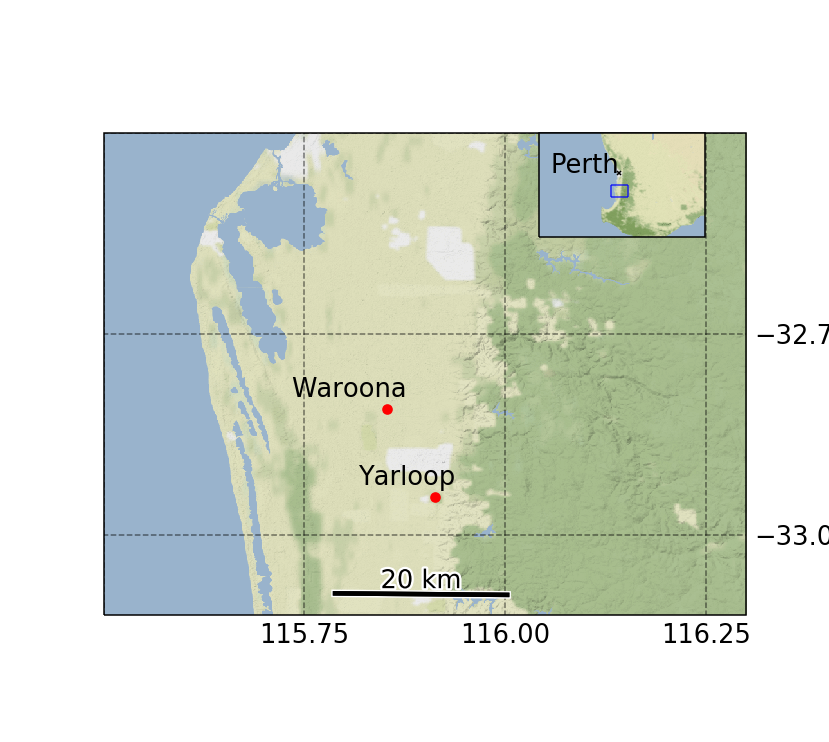

In [2]:


plt.close()

fig = plt.figure()
# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=proj)#stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent(extents['waroona'], crs=proj)

# Add the Stamen data at zoom level 14.
ax.add_image(stamen_terrain, 11)

# Grid lines and labels
gl = ax.gridlines(crs=proj, linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mpl.ticker.FixedLocator(np.arange(110,120,0.25))
gl.ylocator = mpl.ticker.FixedLocator(np.arange(-40,-10,0.25))

# Add a marker for waroona volcano. LON, LAT, ... argument order important!
plt.plot(latlons['waroona'][1], latlons['waroona'][0],
         color='red', linewidth=0, marker='o',
         transform=proj)
plt.plot(latlons['yarloop'][1], latlons['yarloop'][0],
         color='red', linewidth=0, marker='o',
         transform=proj)
plt.plot(latlons['fire_waroona'][1], latlons['fire_waroona'][0],
         color='red', linewidth=0, marker='*',
         transform=proj)

dx,dy = 0.025,0.015
plt.text(latlons['waroona'][1]+dx, latlons['waroona'][0]+dy, 'Waroona',
         horizontalalignment='right',
         transform=proj)
plt.text(latlons['yarloop'][1]+dx, latlons['yarloop'][0]+dy, 'Yarloop',
         horizontalalignment='right',
         transform=proj)

# Add scale
plotting.scale_bar(ax,proj,20)

# Show synoptic area for reference
sub_ax = plt.axes([0.65, 0.65, 0.2, 0.2], projection=proj)
sub_ax.set_extent(extents['waroonas'], crs=proj)

# Add the Stamen data.
sub_ax.add_image(stamen_terrain, 7)

# Add Perth
plt.plot(latlons['perth'][1], latlons['perth'][0],
         color='black', linewidth=0, marker='x', markersize=3,
         transform=proj)

dx,dy = 0.025,0.015
plt.text(latlons['perth'][1]+dx, latlons['perth'][0]+dy, 'Perth',
         horizontalalignment='right',
         transform=proj)

# add lat,lon boundaries as area marker
drawbox=extents['waroona']
gl2 = sub_ax.gridlines(crs=proj, linewidth=1, color='blue', alpha=0.8, linestyle='-', draw_labels=False)
gl2.xlocator = mpl.ticker.FixedLocator([drawbox[0],drawbox[1]])
gl2.ylocator = mpl.ticker.FixedLocator([drawbox[2],drawbox[3]])

plt.show()

### Try again using google map to show Waroona, Yarloop

Request map from google, add sub_ax map, add scale, maybe add ignition point?


<IPython.core.display.Javascript object>


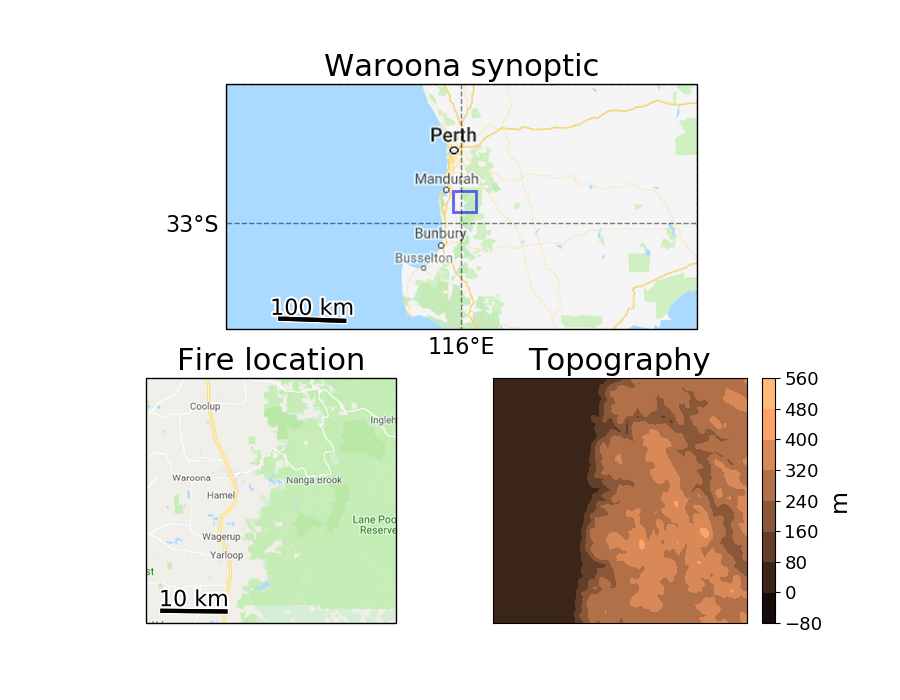

drawing grid


C:\Users\jgreensl\AppData\Local\conda\conda\envs\BOMenv\lib\site-packages\cartopy\mpl\geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001E04BF26D68> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Users\jgreensl\AppData\Local\conda\conda\envs\BOMenv\lib\site-packages\cartopy\mpl\geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001E04BF26B28> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


In [5]:


topog,latt,lont = fio.read_topog()

# Google map image tiles view of synoptic map
fig,ax,proj=plotting.map_google(extents['waroonas'],
                                zoom=6,
                                subplotxyn=[2,1,1],
                                gridlines=[np.arange(-51,-10,2),
                                           np.arange(100,150,4)])
plt.title("Waroona synoptic")
## Add box around zoomed in area
ax.add_patch(mpatches.Rectangle(xy=latlons['waroona'][::-1], 
                                width=.4, 
                                height=.3,
                                #facecolor=None,
                                fill=False,
                                edgecolor='blue',
                                linewidth=2,
                                #linestyle='-',
                                alpha=0.6, 
                                transform=ccrs.PlateCarree()))
## add text?

## Add scale
scaleloc=(0.2,0.05)
plotting.scale_bar(ax,proj,100, location=scaleloc)


## Look at waroona and yarloop
_,ax2,_ = plotting.map_google(extents['waroona'],zoom=10,fig=fig,subplotxyn=[2,2,3],draw_gridlines=False)
plt.title("Fire location")

## Add scale
plotting.scale_bar(ax2,proj,10, location=scaleloc)

## Add contour plot showing topography
plt.subplot(2,2,4)
plotting.map_topography(extents['waroona'], topog,latt,lont)

plt.show()

## Show nested grids and maybe fire extent

#### Fire extent ideally from shape files QGIS output

Overlaid on a zoomed in google map I think is best

## Plot winds at surface and high troposphere

Quiver for horizontal winds, contour to show vertical windspeed

Add coastlines to map for context

<IPython.core.display.Javascript object>


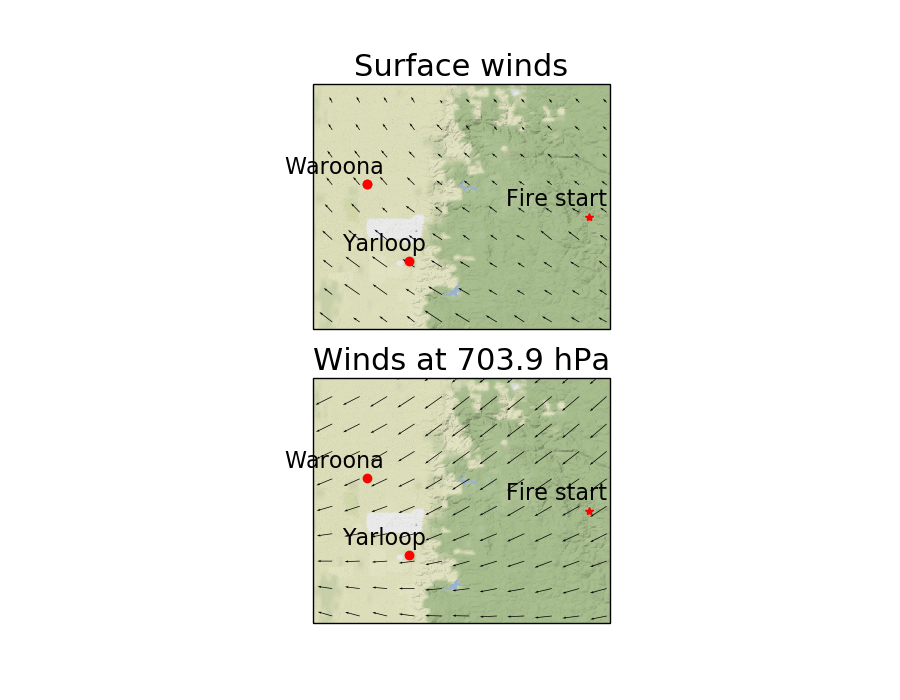

In [10]:
plt.close()

data=fio.read_waroona(fio._files_waroona_old_[0],old=True)

lat=data['latitude']
lon=data['longitude']
u=data['x_wind']
v=data['y_wind']

# Reduce resolution by skipping n-1 datapoints in every n
skiplen = 10
skip=(slice(None,None,skiplen),slice(None,None,skiplen))
latlr = lat[::skiplen]
lonlr = lon[::skiplen]
usurflr = u[0][skip]
vsurflr = v[0][skip]
zlev=65
uhighlr = u[zlev][skip] # higher altitude winds
vhighlr = v[zlev][skip]
arrowscale=70 # smaller number makes arrows huge in quiver plot

fig = plt.figure()
# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(2, 1, 1, projection=proj)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent(extents['waroona'], crs=proj)

# Add the Stamen data at zoom level 11.
ax.add_image(stamen_terrain, 11)
# add waroona, yarloop, fire start
plotting.map_add_locations(['waroona','yarloop'], proj=proj, text=['Waroona', 'Yarloop'])
plotting.map_add_locations(['fire_waroona'], proj=proj, text=['Fire start'], marker='*')


# Add a marker for waroona volcano. LON, LAT, ... argument order important!
plt.plot(latlons['waroona'][1], latlons['waroona'][0],
         color='red', linewidth=0, marker='o',
         transform=proj)

# PLOT THE QUIVER WITH WINDS
plt.title("Surface winds")
# Add arrows to show the wind vectors
plt.quiver(lonlr, latlr, usurflr, vsurflr, zorder=2,color='k', scale=arrowscale)


# Plot high winds too
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Limit the extent of the map to a small longitude/latitude range.
ax2.set_extent(extents['waroona'], crs=proj)

# Add the Stamen data at zoom level 14.
ax2.add_image(stamen_terrain, 11)
# add waroona, yarloop, fire start
plotting.map_add_locations(['waroona','yarloop'], proj=proj, text=['Waroona', 'Yarloop'])
plotting.map_add_locations(['fire_waroona'], proj=proj, text=['Fire start'], marker='*')

# quiver at higher altitude
plt.title("Winds at %.1f hPa"%np.nanmean(p[zlev]/100.))
plt.quiver(lonlr, latlr, uhighlr, vhighlr, zorder=2,color='k',scale = arrowscale)


plt.show()

## Nested Grid and fire outline

 - Show nested gridding, legend shows resolution
 - google map background or else topography

potentially google mapping doesnt work on NCI?

#### Shape file to show fire extend on zoomed map





<IPython.core.display.Javascript object>


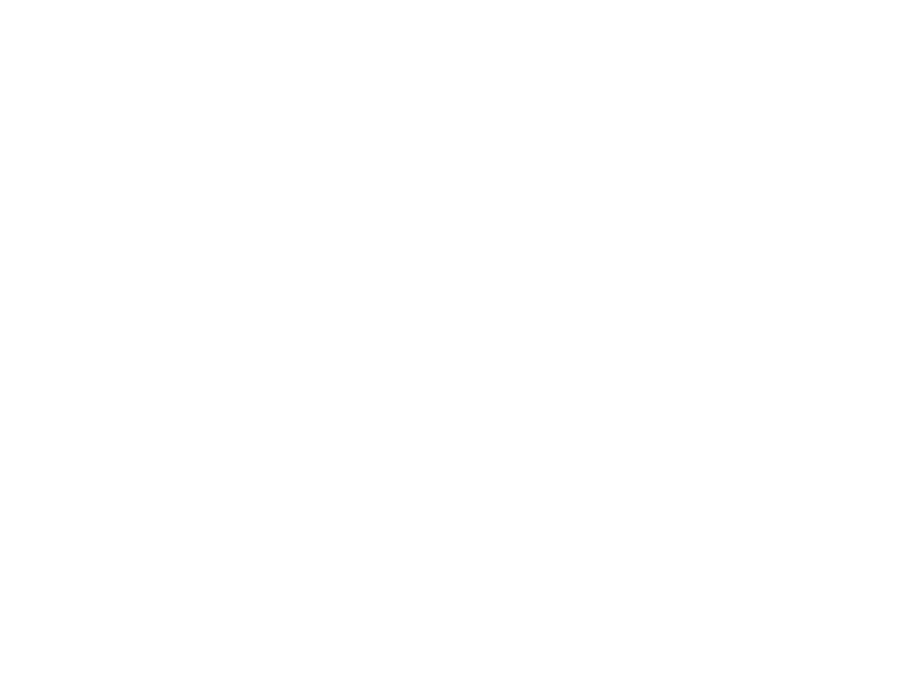

Showing
{'properties': OrderedDict([('OBJECTID_1', 'int:9'), ('OBJECTID', 'int:9'), ('LegendLab', 'str:50'), ('Source', 'str:50'), ('Shape_Leng', 'float:19.11'), ('Fixed', 'int:4'), ('Shape_Le_1', 'float:19.11'), ('Date', 'str:50')]), 'geometry': 'LineString'}


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f5852e91b48> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


In [16]:
# Area including nested grid bounds
extent = [100,135,-40,-10]

fig, ax, gproj = plotting.map_google(extent, zoom=5 ,subplotxyn=[2,1,1])

# Add scale
plotting.scale_bar(ax,gproj,100)


## Add boxes for nested grids
#centre=latlons['waroona']
#ax.add_patch(mpatches.Rectangle(xy=centre[::-1], 
#                                width=5, 
#                                height=5,
#                                #facecolor=None,
#                                fill=False,
#                                edgecolor='blue',
#                                linewidth=2,
#                                linestyle='--',
#                                alpha=0.6, 
#                                transform=ccrs.PlateCarree()))

#transform = ccrs.PlateCarree()._as_mpl_transform(ax)
#ax.annotate('Nest 1', xy=(centre[1]+5, centre[0]+5), xycoords=transform,
#            ha='right', va='top')
print("Showing")
plt.show()


#Read shape file
import fiona
fpath = "data/waroona/Isochrones_merged_sort_20160308.shp"
## NEED .shx and .dbf files to use this shape file

shape = fiona.open(fpath)
print (shape.schema)
##{'geometry': 'LineString', 'properties': OrderedDict([(u'FID', 'float:11')])}
##first feature of the shapefile
#first = next(iter(shape))
#print(first)# (GeoJSON format)
##{'geometry': {'type': 'LineString', 'coordinates': [(0.0, 0.0), (25.0, 10.0), (50.0, 50.0)]}, 'type': 'Feature', 'id': '0', 'properties': OrderedDict([(u'FID', 0.0)])}
#for item in iter(shape):
#    print("============")
#    print(item)




### Look at cloud parameters

#### Relative humidity

Specific humidity is available from model output, this is converted to an approximation of relative humidity using temperature and pressure.

#### Water+ice content

Straight from model output

##### Any way to add the F160 here?

TODO for later, maybe replace wind contourf with skew t log p plot

<IPython.core.display.Javascript object>


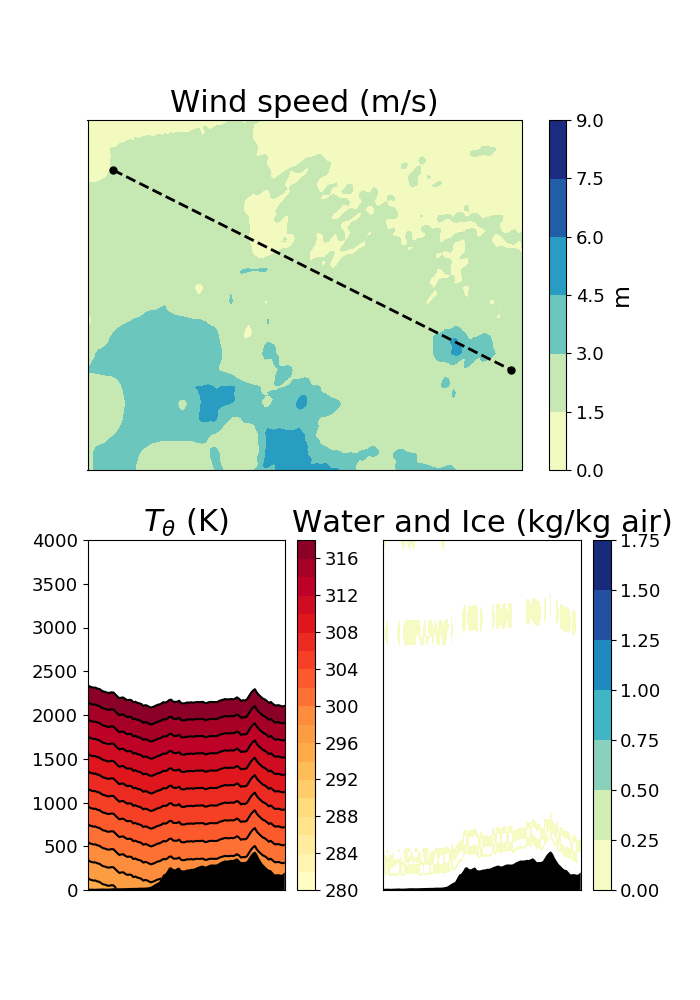

In [5]:
start,end = transects['waroona1']
npoints = 100

# Pull out cross section of topography and height
slicetopog = utils.cross_section(topog,latt,lont,start,end,npoints=npoints)
xticks,xlabels = utils.cross_section_ticks_labels(start,end)
xaxis=np.linspace(0,1,npoints)
slicex=np.tile(xaxis,(nz,1))


## Image showing topography (with wind speeds?) and transects of vert motion and wind speed
plt.close()
waroona=plotting._extents_['waroona']
f = plt.figure(figsize=[7,10])

ax1 = plt.subplot(2,1,1)
# Wind speed contour, very similar to topography just with different expected values and colour map
smap = plt.cm.get_cmap('YlGnBu')
plotting.map_contourf(waroona,s[0],lat,lon,cmap=smap,clabel='m/s')
plt.
# add waroona, yarloop, fire start
plotting.map_add_locations(['waroona','yarloop'], text=['Waroona', 'Yarloop'], textcolor='white')
plotting.map_add_locations(['fire_waroona'],text = ['Fire start'], marker='*', textcolor='white')

plt.title('Wind speed (m/s)')
# start to end x=[lon0,lon1], y=[lat0, lat1]
plt.plot([start[1],end[1]],[start[0],end[0], ], '--k', 
         linewidth=2, marker='o', markersize=5)

ax2 = plt.subplot(2,2,3)
plotting.transect_theta(theta,zth,lat,lon,start,end,topog=topog,latt=latt,lont=lont)

ax3 = plt.subplot(2,2,4)
plotting.transect_qc(qc,zth,lat,lon,start,end,topog=topog,latt=latt,lont=lont)
plt.yticks([])

plt.show()

## Time series

1. pull out data points over time
 - pressure
 - temperature
 - wind speed
 - wind direction (arc tan y/x)
2. overplotted with data from AWS when possible


In [1]:
from utilities import fio,utils

data=fio.read_waroona(fio._files_waroona_old_,
                      old=True, 
                      keepvars=['air_pressure','air_temperature','air_temperature_0','x_wind','y_wind'])
print(data['air_pressure'].shape)
lats=data['latitude']
lons=data['longitude']

# Pull out data at one latlon
compare_point = latlons['fire_waroona']
lati,loni = utils.lat_lon_index(compare_point[0],compare_point[1],lats,lons)

# datetime array for x axis
datetimes=utils.date_from_gregorian(data['time'])
print(datetimes)

# pull out the bits we want
p=data['air_pressure'][:,0,lati,loni]

INFO: Reading  data/waroona/umnsaa_pc2016010515.nc  ... 
INFO: finished reading  data/waroona/umnsaa_pc2016010515.nc
INFO: Reading  data/waroona/umnsaa_pc2016010516.nc  ... 
INFO: finished reading  data/waroona/umnsaa_pc2016010516.nc
DEBUG: air_temperature (1, 400, 400) (1, 400, 400)
DEBUG: air_temperature (2, 400, 400)


KeyError: 'air_temperature_0'